## 1) Data collection and loading

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Reading eeg data from csv file to a dataframe called "eeg_data"
eeg_data = pd.read_csv("EEG_data.csv")
eeg_data.head()

,SubjectID,VideoID,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,predefinedlabel,user-definedlabeln
0,0.0,0.0,56.0,43.0,278.0,301963.0,90612.0,33735.0,23991.0,27946.0,45097.0,33228.0,8293.0,0.0,0.0
1,0.0,0.0,40.0,35.0,-50.0,73787.0,28083.0,1439.0,2240.0,2746.0,3687.0,5293.0,2740.0,0.0,0.0
2,0.0,0.0,47.0,48.0,101.0,758353.0,383745.0,201999.0,62107.0,36293.0,130536.0,57243.0,25354.0,0.0,0.0
3,0.0,0.0,47.0,57.0,-5.0,2012240.0,129350.0,61236.0,17084.0,11488.0,62462.0,49960.0,33932.0,0.0,0.0
4,0.0,0.0,44.0,53.0,-8.0,1005145.0,354328.0,37102.0,88881.0,45307.0,99603.0,44790.0,29749.0,0.0,0.0


In [3]:
# demographic_info.csv dataset is loaded into dataframe called "demogrphic_data"
demographic_data = pd.read_csv("demographic_info.csv")
demographic_data.head()

,subject ID,age,ethnicity,gender
0,0,25,Han Chinese,M
1,1,24,Han Chinese,M
2,2,31,English,M
3,3,28,Han Chinese,F
4,4,24,Bengali,M


## 2) Data exploration

In [4]:
eeg_data.shape # eeg_data contains (12811 rows, 15 columns)

(12811, 15)

In [5]:
eeg_data.columns

Index(['SubjectID', 'VideoID', 'Attention', 'Mediation', 'Raw', 'Delta',
       'Theta', 'Alpha1', 'Alpha2', 'Beta1', 'Beta2', 'Gamma1', 'Gamma2',
       'predefinedlabel', 'user-definedlabeln'],
      dtype='object')

In [6]:
demographic_data.columns

Index(['subject ID', ' age', ' ethnicity', ' gender'], dtype='object')

In [7]:
demographic_data.shape # demographic data contains (10 rows and 4 columns)

(10, 4)

In [8]:
# Renaming the column "subject ID" to "Subject ID"
demographic_data.rename(columns={"subject ID": "SubjectID"},inplace=True)

In [9]:
demographic_data

,SubjectID,age,ethnicity,gender
0,0,25,Han Chinese,M
1,1,24,Han Chinese,M
2,2,31,English,M
3,3,28,Han Chinese,F
4,4,24,Bengali,M
5,5,24,Han Chinese,M
6,6,24,Han Chinese,M
7,7,25,Han Chinese,M
8,8,25,Han Chinese,M
9,9,24,Han Chinese,F


### Merging eeg_data and demographic_info data using inner join on Column "SubjectID"

In [10]:
merged_data_before = pd.merge(eeg_data,demographic_data,how="inner",on="SubjectID")
merged_data_before.head()

,SubjectID,VideoID,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,predefinedlabel,user-definedlabeln,age,ethnicity,gender
0,0.0,0.0,56.0,43.0,278.0,301963.0,90612.0,33735.0,23991.0,27946.0,45097.0,33228.0,8293.0,0.0,0.0,25,Han Chinese,M
1,0.0,0.0,40.0,35.0,-50.0,73787.0,28083.0,1439.0,2240.0,2746.0,3687.0,5293.0,2740.0,0.0,0.0,25,Han Chinese,M
2,0.0,0.0,47.0,48.0,101.0,758353.0,383745.0,201999.0,62107.0,36293.0,130536.0,57243.0,25354.0,0.0,0.0,25,Han Chinese,M
3,0.0,0.0,47.0,57.0,-5.0,2012240.0,129350.0,61236.0,17084.0,11488.0,62462.0,49960.0,33932.0,0.0,0.0,25,Han Chinese,M
4,0.0,0.0,44.0,53.0,-8.0,1005145.0,354328.0,37102.0,88881.0,45307.0,99603.0,44790.0,29749.0,0.0,0.0,25,Han Chinese,M


In [11]:
# Renaming columns
merged_data_before.rename(columns={" gender":"Gender"," ethnicity": "Ethnicity"," age":"Age"},inplace=True)

In [12]:
merged_data_before["Ethnicity"]

0        Han Chinese
1        Han Chinese
2        Han Chinese
3        Han Chinese
4        Han Chinese
            ...     
12806    Han Chinese
12807    Han Chinese
12808    Han Chinese
12809    Han Chinese
12810    Han Chinese
Name: Ethnicity, Length: 12811, dtype: object

In [13]:
merged_data_before["Gender"]

0        M
1        M
2        M
3        M
4        M
        ..
12806    F
12807    F
12808    F
12809    F
12810    F
Name: Gender, Length: 12811, dtype: object

In [14]:
merged_data_before.head()

,SubjectID,VideoID,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,predefinedlabel,user-definedlabeln,Age,Ethnicity,Gender
0,0.0,0.0,56.0,43.0,278.0,301963.0,90612.0,33735.0,23991.0,27946.0,45097.0,33228.0,8293.0,0.0,0.0,25,Han Chinese,M
1,0.0,0.0,40.0,35.0,-50.0,73787.0,28083.0,1439.0,2240.0,2746.0,3687.0,5293.0,2740.0,0.0,0.0,25,Han Chinese,M
2,0.0,0.0,47.0,48.0,101.0,758353.0,383745.0,201999.0,62107.0,36293.0,130536.0,57243.0,25354.0,0.0,0.0,25,Han Chinese,M
3,0.0,0.0,47.0,57.0,-5.0,2012240.0,129350.0,61236.0,17084.0,11488.0,62462.0,49960.0,33932.0,0.0,0.0,25,Han Chinese,M
4,0.0,0.0,44.0,53.0,-8.0,1005145.0,354328.0,37102.0,88881.0,45307.0,99603.0,44790.0,29749.0,0.0,0.0,25,Han Chinese,M


In [15]:
# Total rows, columns
merged_data_before.shape

(12811, 18)

In [16]:
merged_data_before_save = merged_data_before.to_csv("./data generated/merged_data_before_dummies.csv",index=False)

## 3) Feature transformation

### Converting non numerical values into numerical values => Feature encoding

In [17]:
merged_data_before["Gender"].dtype , merged_data_before["Ethnicity"].dtype

(dtype('O'), dtype('O'))

In [18]:
# Gender and Ethnicity are non numerical (categorical features)
merged_data = pd.get_dummies(merged_data_before)
merged_data.head()

,SubjectID,VideoID,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,...,Gamma1,Gamma2,predefinedlabel,user-definedlabeln,Age,Ethnicity_Bengali,Ethnicity_English,Ethnicity_Han Chinese,Gender_F,Gender_M
0,0.0,0.0,56.0,43.0,278.0,301963.0,90612.0,33735.0,23991.0,27946.0,...,33228.0,8293.0,0.0,0.0,25,0,0,1,0,1
1,0.0,0.0,40.0,35.0,-50.0,73787.0,28083.0,1439.0,2240.0,2746.0,...,5293.0,2740.0,0.0,0.0,25,0,0,1,0,1
2,0.0,0.0,47.0,48.0,101.0,758353.0,383745.0,201999.0,62107.0,36293.0,...,57243.0,25354.0,0.0,0.0,25,0,0,1,0,1
3,0.0,0.0,47.0,57.0,-5.0,2012240.0,129350.0,61236.0,17084.0,11488.0,...,49960.0,33932.0,0.0,0.0,25,0,0,1,0,1
4,0.0,0.0,44.0,53.0,-8.0,1005145.0,354328.0,37102.0,88881.0,45307.0,...,44790.0,29749.0,0.0,0.0,25,0,0,1,0,1


In [19]:
merged_data_save = merged_data.to_csv("./data generated/merged_data_after_dummies.csv",index=False)

### Search for NaN values in all columns, if present Impute them => Imputation

In [20]:
merged_data.isna().sum()

SubjectID                0
VideoID                  0
Attention                0
Mediation                0
Raw                      0
Delta                    0
Theta                    0
Alpha1                   0
Alpha2                   0
Beta1                    0
Beta2                    0
Gamma1                   0
Gamma2                   0
predefinedlabel          0
user-definedlabeln       0
Age                      0
Ethnicity_Bengali        0
Ethnicity_English        0
Ethnicity_Han Chinese    0
Gender_F                 0
Gender_M                 0
dtype: int64

👆 From this we infer that there are no NaN values in our dataset

### Feature Scaling - yet to be completed

In [21]:
eeg_data.predefinedlabel.value_counts()

0.0    6662
1.0    6149
Name: predefinedlabel, dtype: int64

In [22]:
eeg_data["user-definedlabeln"].value_counts()

1.0    6567
0.0    6244
Name: user-definedlabeln, dtype: int64

After each session, the student rated his/her confusion level on a scale of 1-7, where one corresponded to the least confusing and seven corresponded to the most confusing. 
These labels if further normalized into labels of whether the students are confused or not. 
This label is offered as self-labelled confusion in addition to our predefined label of confusion.

# Exploratory Data Analysis

In [23]:
# Description of non-numerical columns

merged_data.describe()

,SubjectID,VideoID,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,...,Gamma1,Gamma2,predefinedlabel,user-definedlabeln,Age,Ethnicity_Bengali,Ethnicity_English,Ethnicity_Han Chinese,Gender_F,Gender_M
count,12811.000000,12811.000000,12811.000000,12811.000000,12811.000000,1.281100e+04,1.281100e+04,1.281100e+04,1.281100e+04,1.281100e+04,...,1.281100e+04,1.281100e+04,12811.000000,12811.000000,12811.000000,12811.000000,12811.000000,12811.000000,12811.000000,12811.000000
mean,4.487394,4.390602,41.313871,47.182656,65.570760,6.057853e+05,1.680526e+05,4.138435e+04,3.318339e+04,2.431837e+04,...,2.959255e+04,1.441597e+04,0.479978,0.512606,25.409960,0.101085,0.100226,0.798689,0.200999,0.799001
std,2.865373,2.913232,23.152953,22.655976,597.921035,6.376236e+05,2.441346e+05,7.243082e+04,5.831410e+04,3.837968e+04,...,7.982637e+04,3.603523e+04,0.499618,0.499861,2.205148,0.301453,0.300313,0.400996,0.400763,0.400763
min,0.000000,0.000000,0.000000,0.000000,-2048.000000,4.480000e+02,1.700000e+01,2.000000e+00,2.000000e+00,3.000000e+00,...,1.000000e+00,2.000000e+00,0.000000,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,27.000000,37.000000,-14.000000,9.806400e+04,2.691750e+04,6.838000e+03,6.852000e+03,6.140000e+03,...,4.058000e+03,2.167500e+03,0.000000,0.000000,24.000000,0.000000,0.000000,1.000000,0.000000,1.000000
50%,4.000000,4.000000,43.000000,51.000000,35.000000,3.954870e+05,8.133100e+04,1.750000e+04,1.495900e+04,1.281800e+04,...,9.763000e+03,5.116000e+03,0.000000,1.000000,25.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,7.000000,7.000000,57.000000,63.000000,90.000000,9.166230e+05,2.052760e+05,4.477950e+04,3.455050e+04,2.740600e+04,...,2.488800e+04,1.266950e+04,1.000000,1.000000,25.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,9.000000,9.000000,100.000000,100.000000,2047.000000,3.964663e+06,3.007802e+06,1.369955e+06,1.016913e+06,1.067778e+06,...,1.972506e+06,1.348117e+06,1.000000,1.000000,31.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [24]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12811 entries, 0 to 12810
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   SubjectID              12811 non-null  float64
 1   VideoID                12811 non-null  float64
 2   Attention              12811 non-null  float64
 3   Mediation              12811 non-null  float64
 4   Raw                    12811 non-null  float64
 5   Delta                  12811 non-null  float64
 6   Theta                  12811 non-null  float64
 7   Alpha1                 12811 non-null  float64
 8   Alpha2                 12811 non-null  float64
 9   Beta1                  12811 non-null  float64
 10  Beta2                  12811 non-null  float64
 11  Gamma1                 12811 non-null  float64
 12  Gamma2                 12811 non-null  float64
 13  predefinedlabel        12811 non-null  float64
 14  user-definedlabeln     12811 non-null  float64
 15  Ag

In [25]:
attention_greater_0 = merged_data[merged_data["Attention"]  > 0.0]
attention_greater_0.head()

,SubjectID,VideoID,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,...,Gamma1,Gamma2,predefinedlabel,user-definedlabeln,Age,Ethnicity_Bengali,Ethnicity_English,Ethnicity_Han Chinese,Gender_F,Gender_M
0,0.0,0.0,56.0,43.0,278.0,301963.0,90612.0,33735.0,23991.0,27946.0,...,33228.0,8293.0,0.0,0.0,25,0,0,1,0,1
1,0.0,0.0,40.0,35.0,-50.0,73787.0,28083.0,1439.0,2240.0,2746.0,...,5293.0,2740.0,0.0,0.0,25,0,0,1,0,1
2,0.0,0.0,47.0,48.0,101.0,758353.0,383745.0,201999.0,62107.0,36293.0,...,57243.0,25354.0,0.0,0.0,25,0,0,1,0,1
3,0.0,0.0,47.0,57.0,-5.0,2012240.0,129350.0,61236.0,17084.0,11488.0,...,49960.0,33932.0,0.0,0.0,25,0,0,1,0,1
4,0.0,0.0,44.0,53.0,-8.0,1005145.0,354328.0,37102.0,88881.0,45307.0,...,44790.0,29749.0,0.0,0.0,25,0,0,1,0,1


In [26]:
attention_greater_0.shape  #rows reduced from 12811 to 11388 after applying "Attention > 0.0"

(11388, 21)

## UNIVARIATE ANALYSIS

### Univariate analysis using Histogram

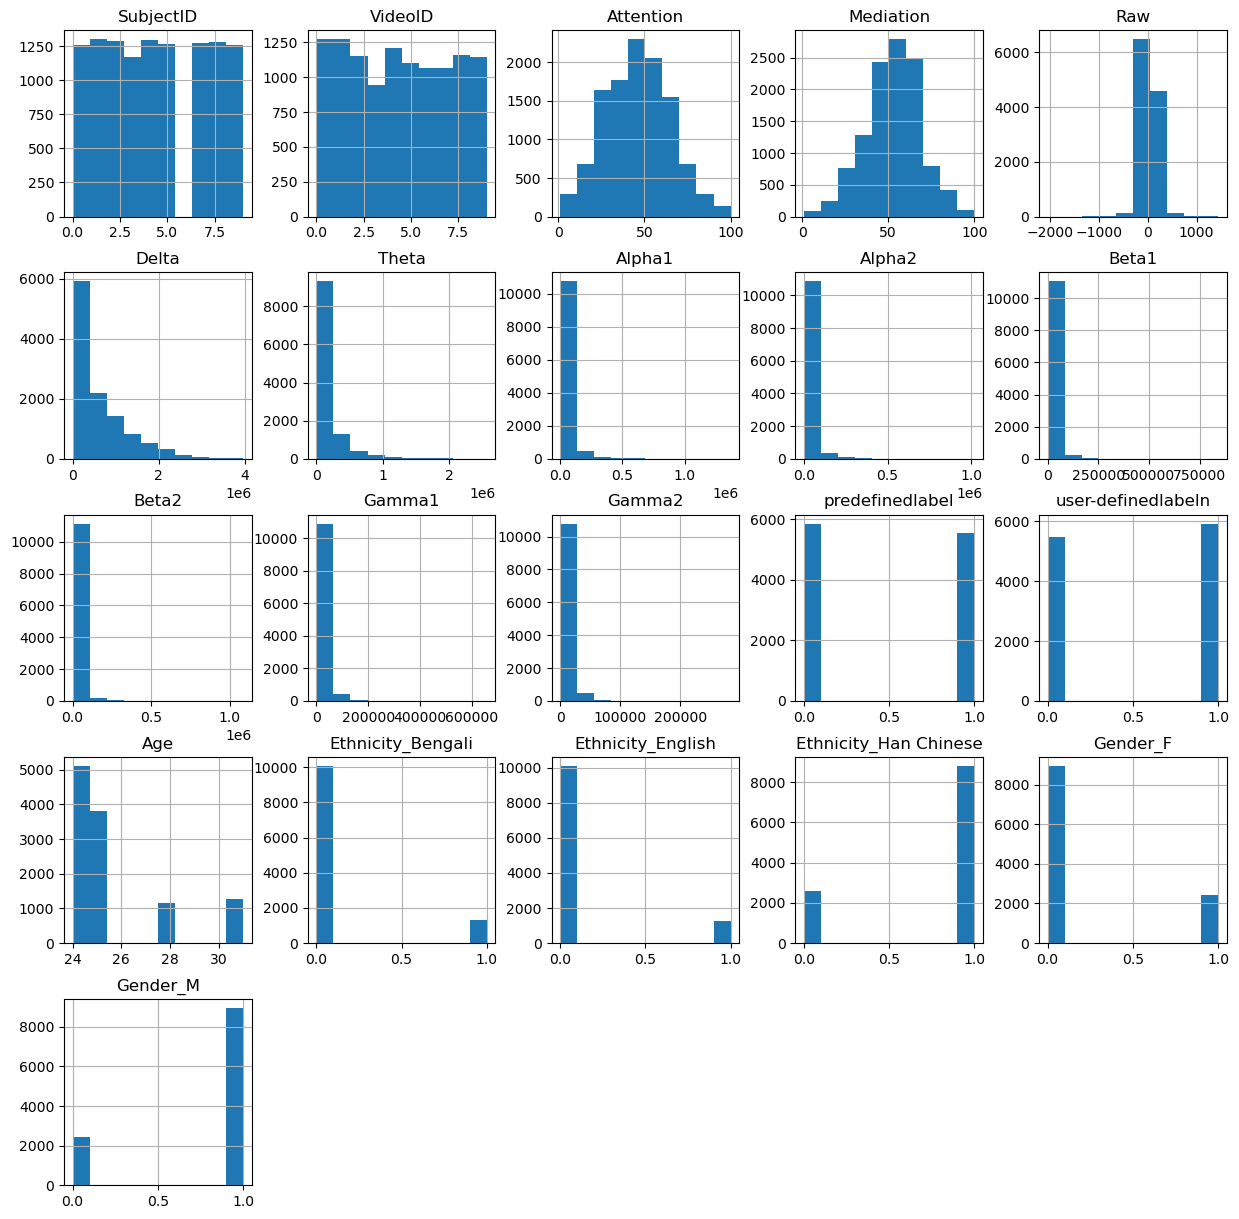

<Figure size 640x480 with 0 Axes>

In [27]:
attention_greater_0.hist(figsize=(15,15));
plt.show();
plt.tight_layout();
plt.savefig(r"C:\Users\HP\Notebook files\IP\plt generated\univariate-analy.png");

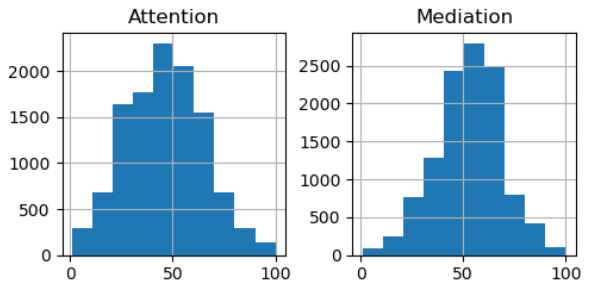

##### From the histogram generated for all columms it is clear that,
#####  `Attention` and `Meditation` follows a `Normal distribution` since they form a bell shaped curve

### Univariate analysis using box plot

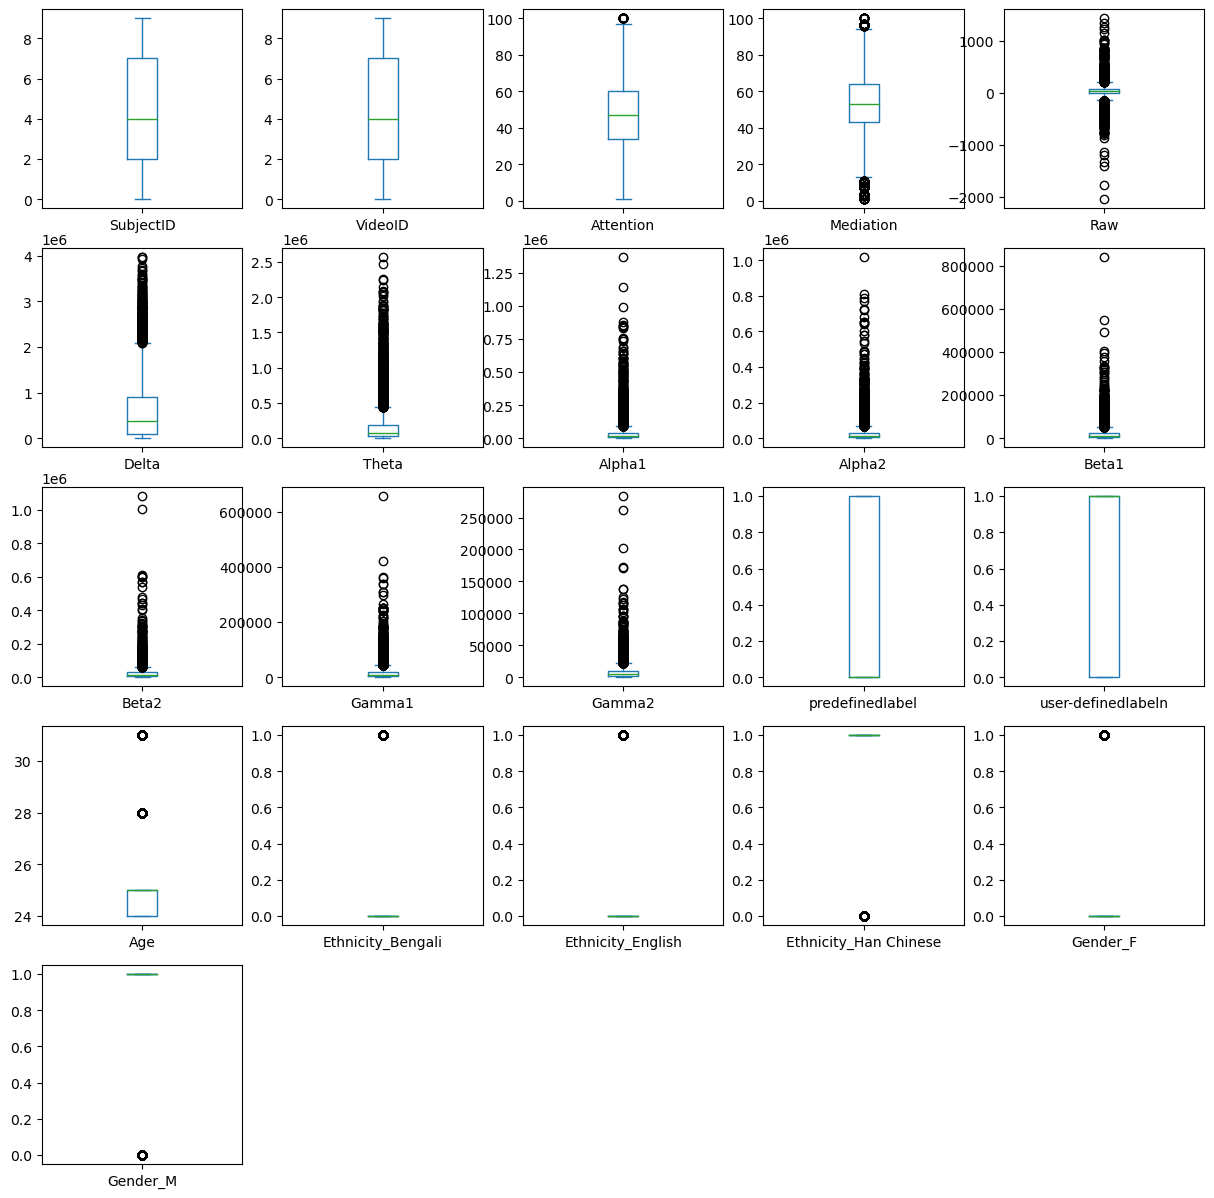

<Figure size 640x480 with 0 Axes>

In [28]:
attention_greater_0.plot(kind='box',figsize=(15,15),subplots=True,layout=(5,5))
plt.show()
plt.savefig(r"C:\Users\HP\Notebook files\IP\plt generated\univariate-boxplot.png")

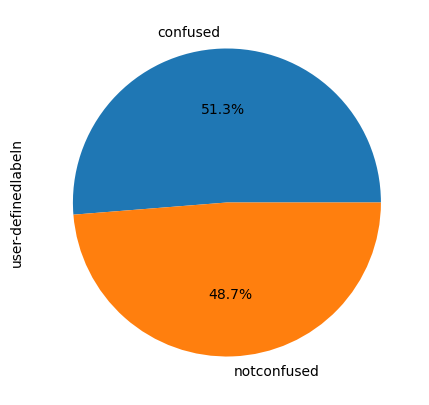

In [29]:
plt.figure(figsize=(5,5))
labels= ["confused","notconfused"]
merged_data["user-definedlabeln"].value_counts().plot(kind='pie',labels=labels,autopct='%1.1f%%')

plt.savefig(r"C:\Users\HP\Notebook files\IP\plt generated\user-definedLabel.png")
plt.show()

In [30]:
pd.crosstab(merged_data_before.Gender,merged_data_before["user-definedlabeln"])

user-definedlabeln,0.0,1.0
Gender,,
F,1297,1278
M,4947,5289


In [31]:
pd.DataFrame(merged_data_before.Gender.value_counts())

,Gender
M,10236
F,2575


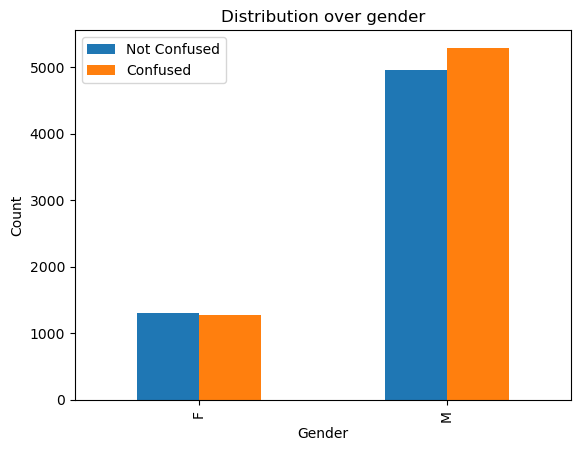

In [32]:
pd.crosstab(merged_data_before.Gender,merged_data_before["user-definedlabeln"]).plot(kind="bar")
plt.legend(["Not Confused","Confused"])
plt.ylabel("Count")
plt.title("Distribution over gender");
plt.savefig(r"C:\Users\HP\Notebook files\IP\plt generated\targeDistr-gender.png")

## MULTIVARIATE ANALYSIS

* establish a sense of relationship of all variables with one another

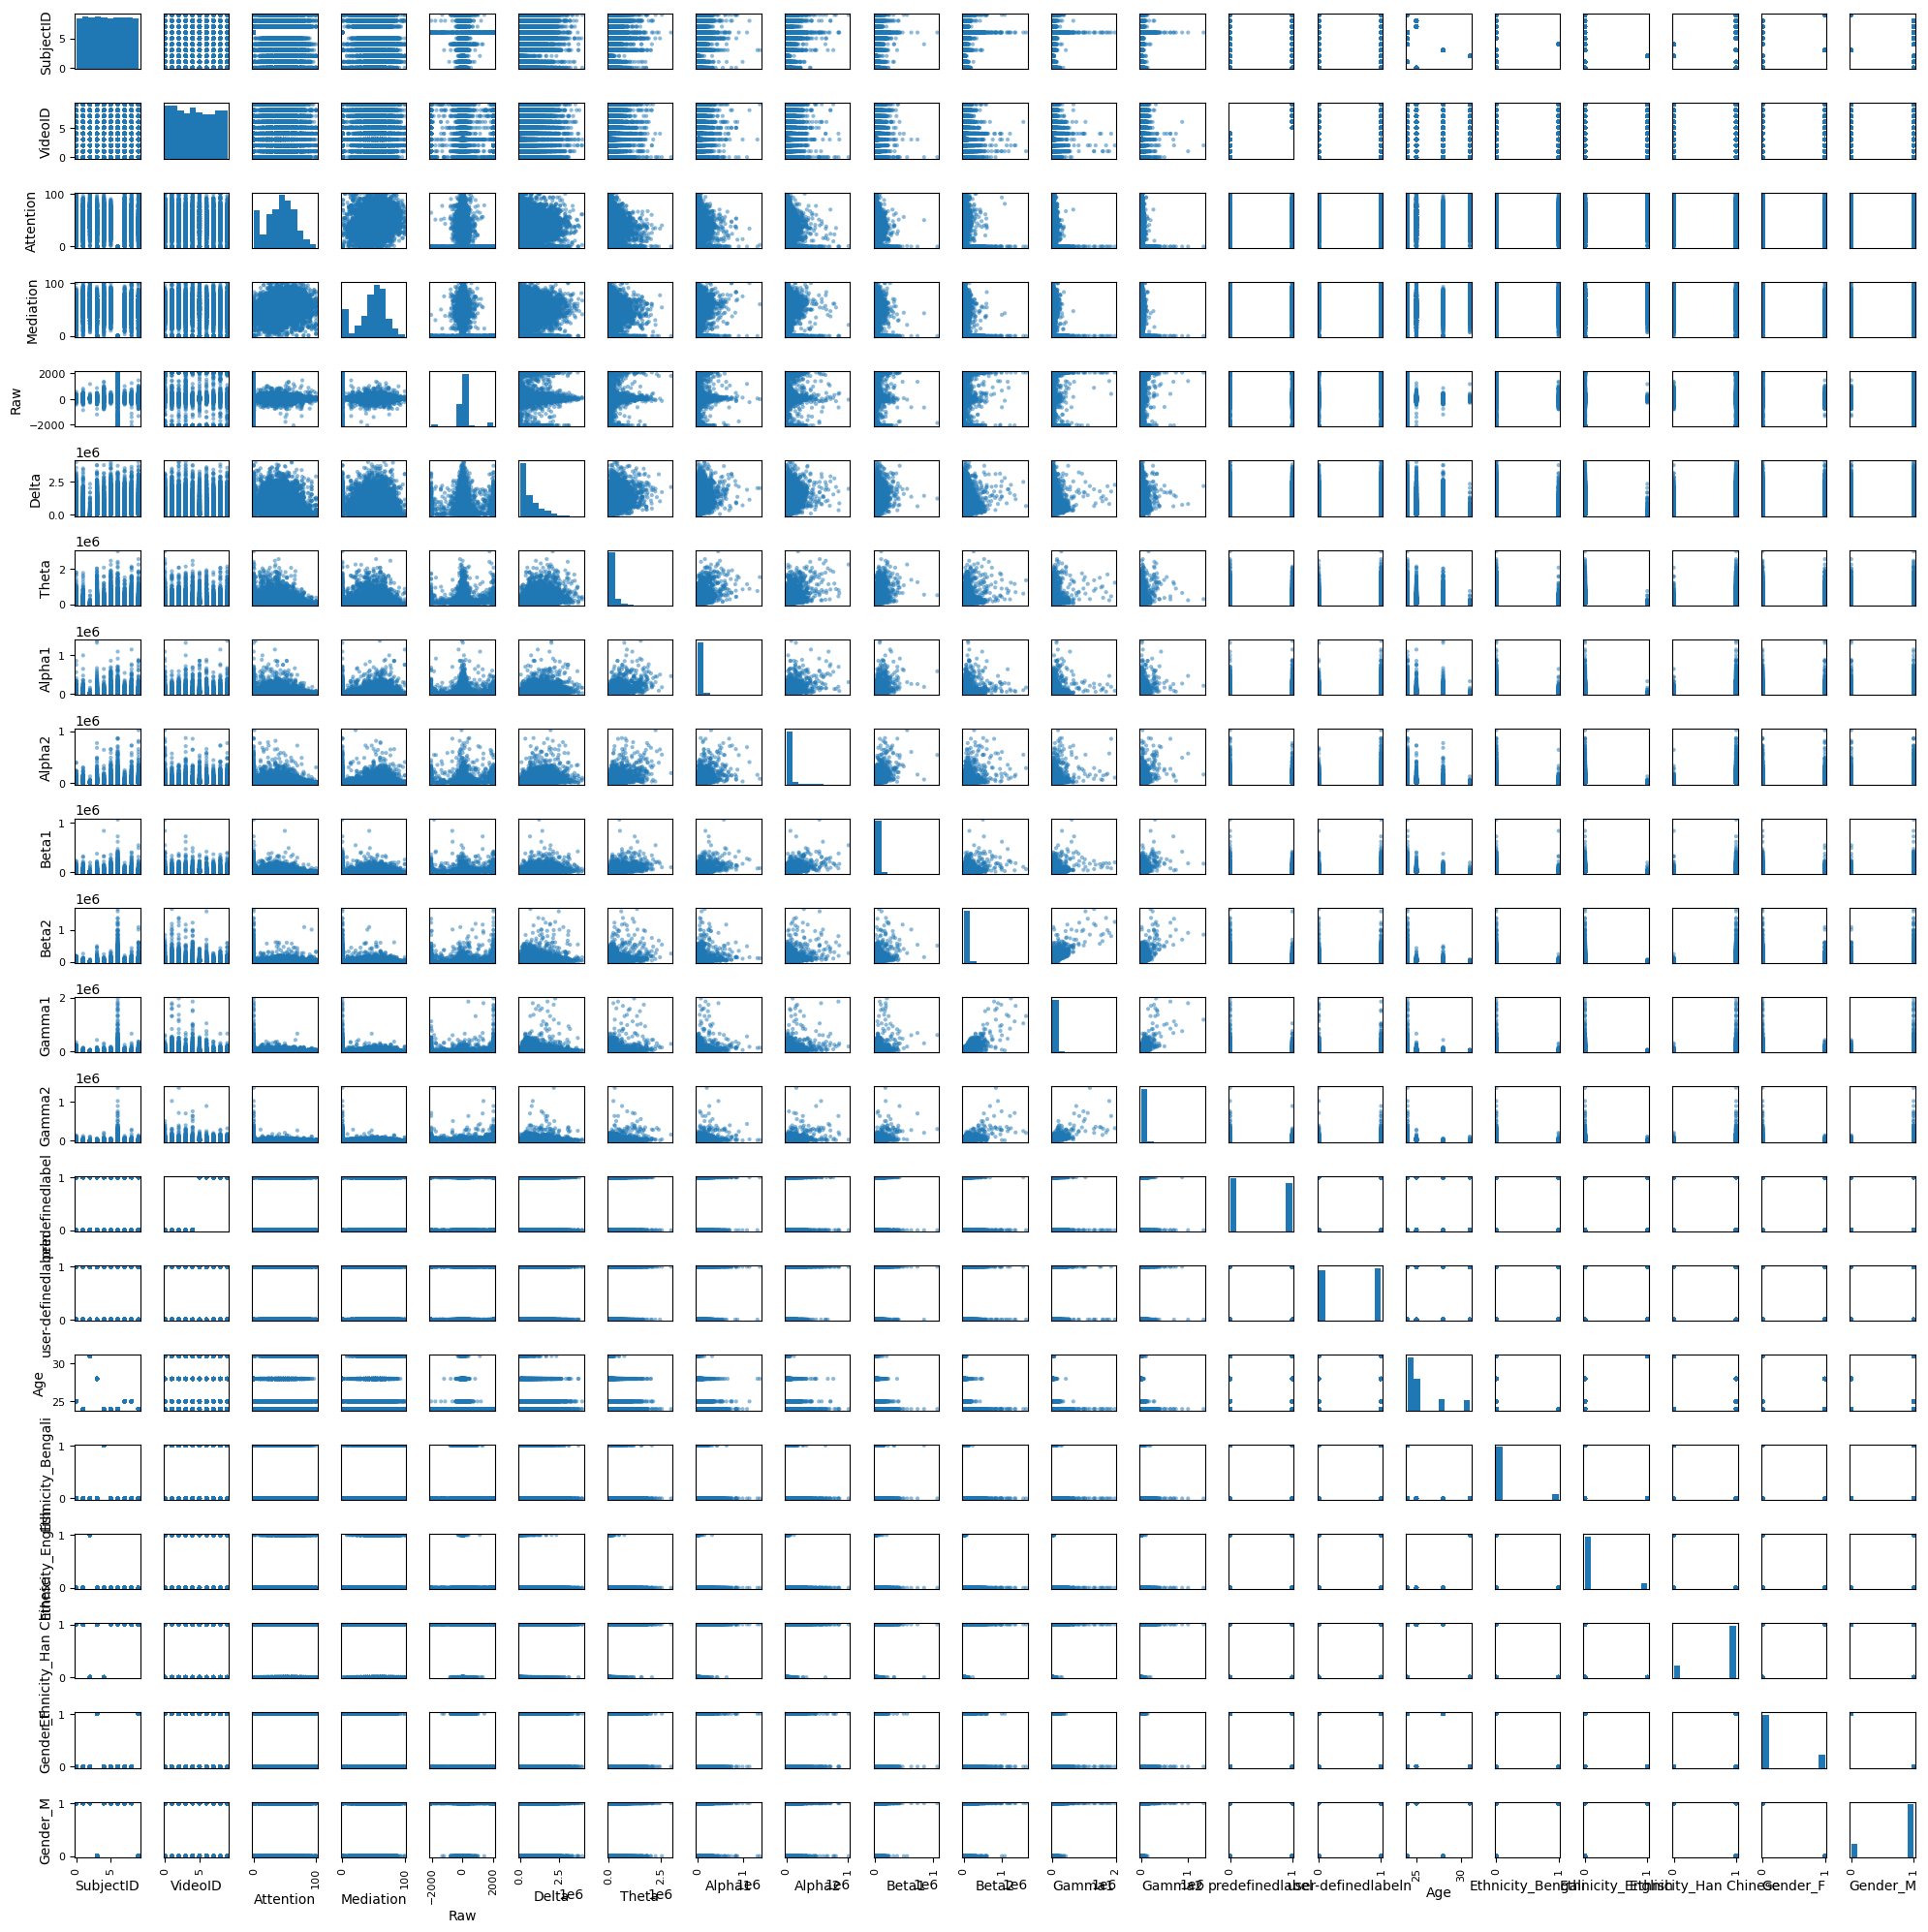

In [33]:
pd.plotting.scatter_matrix(merged_data,figsize=(20,20));
plt.savefig(r"C:\Users\HP\Notebook files\IP\plt generated\multivariate-anal.png")
plt.tight_layout();

## Correlation matrix

In [34]:
import seaborn as sns

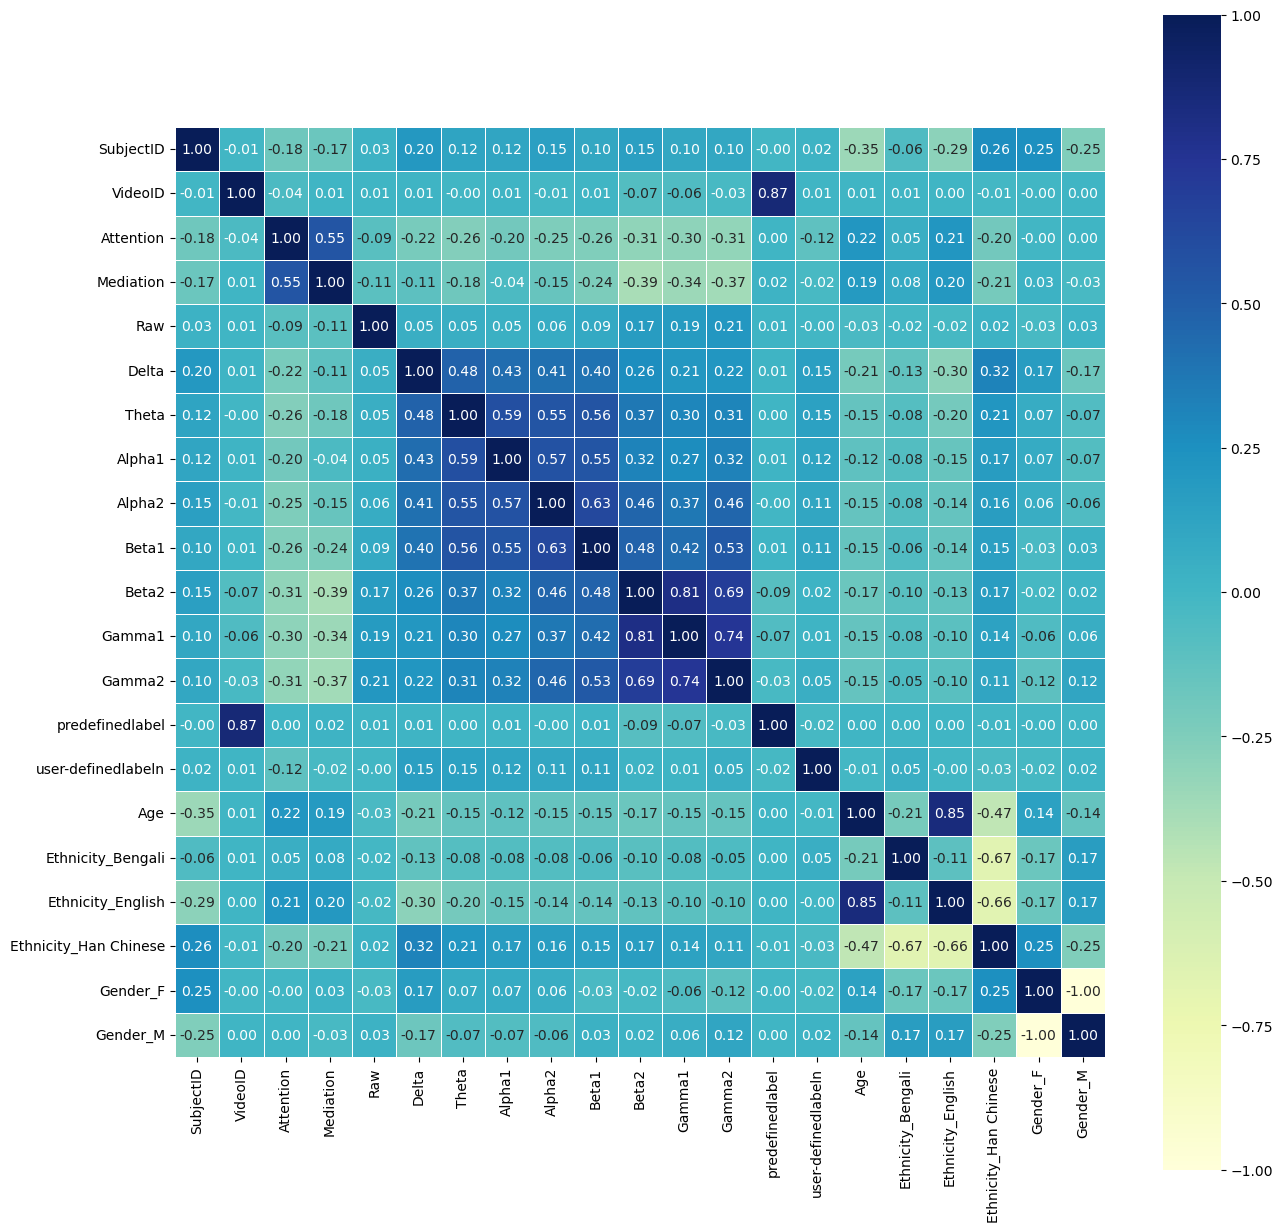

In [35]:
plt.figure(figsize=(15,15))
correlation_matx = merged_data.corr()
sns.heatmap(correlation_matx,square=True,cmap="YlGnBu",annot=True,linewidth=0.5,fmt=".2f");

plt.savefig(r"C:\Users\HP\Notebook files\IP\plt generated\correlation-matrix.png")

In [36]:
merged_data.head()

,SubjectID,VideoID,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,...,Gamma1,Gamma2,predefinedlabel,user-definedlabeln,Age,Ethnicity_Bengali,Ethnicity_English,Ethnicity_Han Chinese,Gender_F,Gender_M
0,0.0,0.0,56.0,43.0,278.0,301963.0,90612.0,33735.0,23991.0,27946.0,...,33228.0,8293.0,0.0,0.0,25,0,0,1,0,1
1,0.0,0.0,40.0,35.0,-50.0,73787.0,28083.0,1439.0,2240.0,2746.0,...,5293.0,2740.0,0.0,0.0,25,0,0,1,0,1
2,0.0,0.0,47.0,48.0,101.0,758353.0,383745.0,201999.0,62107.0,36293.0,...,57243.0,25354.0,0.0,0.0,25,0,0,1,0,1
3,0.0,0.0,47.0,57.0,-5.0,2012240.0,129350.0,61236.0,17084.0,11488.0,...,49960.0,33932.0,0.0,0.0,25,0,0,1,0,1
4,0.0,0.0,44.0,53.0,-8.0,1005145.0,354328.0,37102.0,88881.0,45307.0,...,44790.0,29749.0,0.0,0.0,25,0,0,1,0,1


In [37]:
merged_data["user-definedlabeln"].value_counts()

1.0    6567
0.0    6244
Name: user-definedlabeln, dtype: int64

In [38]:
merged_data["predefinedlabel"].value_counts()

0.0    6662
1.0    6149
Name: predefinedlabel, dtype: int64

In [39]:
merged_data.Age.value_counts()

24    6394
25    3819
28    1314
31    1284
Name: Age, dtype: int64

In [40]:
merged_data["Attention"].value_counts()

0.0     1423
43.0     407
41.0     396
38.0     392
48.0     390
        ... 
93.0      23
3.0       17
94.0      17
97.0      14
96.0       8
Name: Attention, Length: 61, dtype: int64

In [41]:
attention_greater_0

,SubjectID,VideoID,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,...,Gamma1,Gamma2,predefinedlabel,user-definedlabeln,Age,Ethnicity_Bengali,Ethnicity_English,Ethnicity_Han Chinese,Gender_F,Gender_M
0,0.0,0.0,56.0,43.0,278.0,301963.0,90612.0,33735.0,23991.0,27946.0,...,33228.0,8293.0,0.0,0.0,25,0,0,1,0,1
1,0.0,0.0,40.0,35.0,-50.0,73787.0,28083.0,1439.0,2240.0,2746.0,...,5293.0,2740.0,0.0,0.0,25,0,0,1,0,1
2,0.0,0.0,47.0,48.0,101.0,758353.0,383745.0,201999.0,62107.0,36293.0,...,57243.0,25354.0,0.0,0.0,25,0,0,1,0,1
3,0.0,0.0,47.0,57.0,-5.0,2012240.0,129350.0,61236.0,17084.0,11488.0,...,49960.0,33932.0,0.0,0.0,25,0,0,1,0,1
4,0.0,0.0,44.0,53.0,-8.0,1005145.0,354328.0,37102.0,88881.0,45307.0,...,44790.0,29749.0,0.0,0.0,25,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12806,9.0,9.0,64.0,38.0,-39.0,127574.0,9951.0,709.0,21732.0,3872.0,...,2598.0,960.0,1.0,0.0,24,0,0,1,1,0
12807,9.0,9.0,61.0,35.0,-275.0,323061.0,797464.0,153171.0,145805.0,39829.0,...,36574.0,10010.0,1.0,0.0,24,0,0,1,1,0
12808,9.0,9.0,60.0,29.0,-426.0,680989.0,154296.0,40068.0,39122.0,10966.0,...,20427.0,2024.0,1.0,0.0,24,0,0,1,1,0
12809,9.0,9.0,60.0,29.0,-84.0,366269.0,27346.0,11444.0,9932.0,1939.0,...,12323.0,1764.0,1.0,0.0,24,0,0,1,1,0


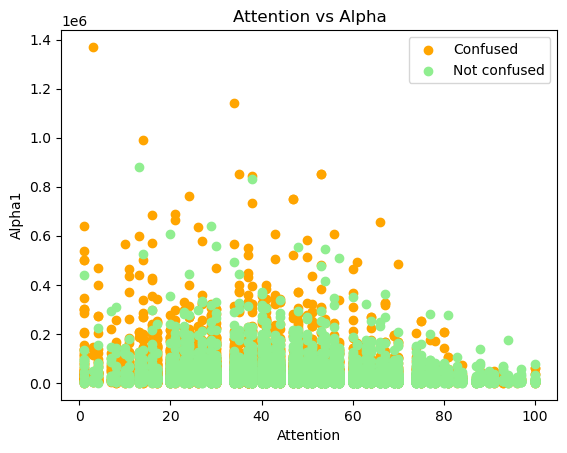

In [42]:
fig,(ax1) = plt.subplots()

ax1.scatter(attention_greater_0.Attention[attention_greater_0["user-definedlabeln"]==1],
          attention_greater_0.Alpha1[attention_greater_0["user-definedlabeln"]==1],
          color="orange");
ax1.scatter(attention_greater_0.Attention[attention_greater_0["user-definedlabeln"]==0],
          attention_greater_0.Alpha1[attention_greater_0["user-definedlabeln"]==0],
          color="lightgreen");

ax1.set_xlabel("Attention")
ax1.set_ylabel("Alpha1");
ax1.legend(["Confused","Not confused"])
ax1.set_title("Attention vs Alpha");
# ax2.set_xlabel("Attention-Not Confused")
# ax2.set_ylabel("Alpha1");

# Confusion related to alpha wave (attentive-alpha wave decrease)
# Alpha -> `Passive attention`
fig.savefig(r"C:\Users\HP\Notebook files\IP\plt generated\attention-alpha.png")

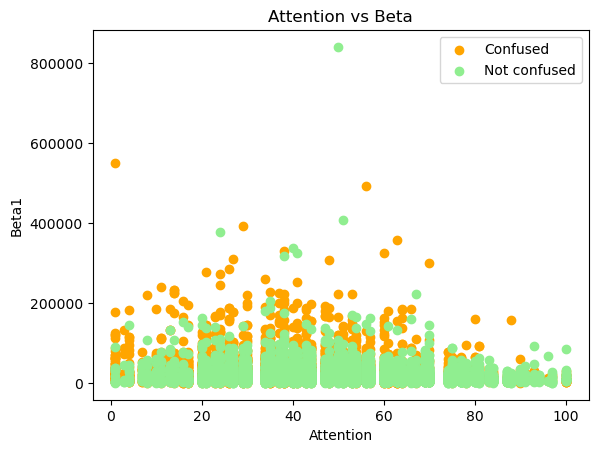

In [43]:
fig,(ax1) = plt.subplots()

ax1.scatter(attention_greater_0.Attention[attention_greater_0["user-definedlabeln"]==1],
          attention_greater_0.Beta1[attention_greater_0["user-definedlabeln"]==1],
          color="orange");
ax1.scatter(attention_greater_0.Attention[attention_greater_0["user-definedlabeln"]==0],
          attention_greater_0.Beta1[attention_greater_0["user-definedlabeln"]==0],
          color="lightgreen");

ax1.set_xlabel("Attention")
ax1.set_ylabel("Beta1");
ax1.legend(["Confused","Not confused"])
ax1.set_title("Attention vs Beta");
# ax2.set_xlabel("Attention-Not Confused")
# ax2.set_ylabel("Alpha1");

# Confusion related to Beta1 wave 
# Beta - external attention, busy
fig.savefig(r"C:\Users\HP\Notebook files\IP\plt generated\attention-beta.png")

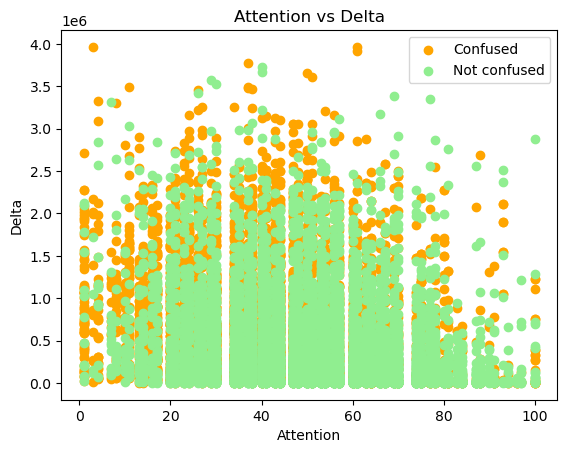

In [44]:
fig,(ax1) = plt.subplots()

ax1.scatter(attention_greater_0.Attention[attention_greater_0["user-definedlabeln"]==1],
          attention_greater_0.Delta[attention_greater_0["user-definedlabeln"]==1],
          color="orange");
ax1.scatter(attention_greater_0.Attention[attention_greater_0["user-definedlabeln"]==0],
          attention_greater_0.Delta[attention_greater_0["user-definedlabeln"]==0],
          color="lightgreen");

ax1.set_xlabel("Attention")
ax1.set_ylabel("Delta");
ax1.legend(["Confused","Not confused"])
ax1.set_title("Attention vs Delta");
# ax2.set_xlabel("Attention-Not Confused")
# ax2.set_ylabel("Alpha1");

# Confusion related to delta wave
# Delta - sleep,dreaming
fig.savefig(r"C:\Users\HP\Notebook files\IP\plt generated\attention-delta.png")

In [45]:
from matplotlib.colors import ListedColormap
import seaborn as sns

sns.color_palette()

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

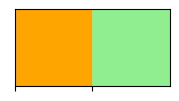

In [46]:
orlg = ['#FFA500','#90EE90']
sns.palplot(sns.color_palette(orlg))

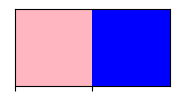

In [47]:
pkb = ['#FFB6C1','#0000FF']
sns.palplot(sns.color_palette(pkb))

In [48]:
orlgr = ListedColormap(sns.color_palette(orlg))

In [49]:
lpbl = ListedColormap(sns.color_palette(pkb))

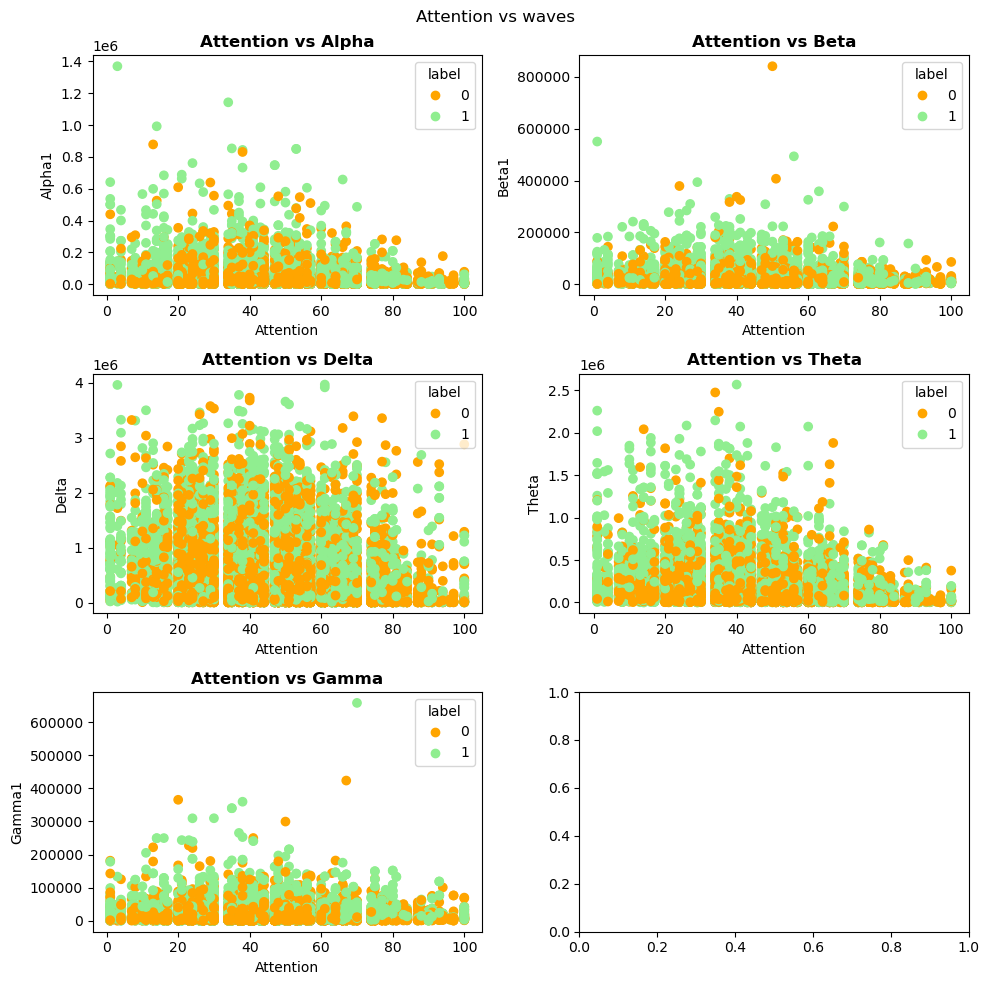

In [50]:
fig,((ax1,ax2),(ax3,ax4),(ax5,ax6)) = plt.subplots(nrows=3,ncols=2,figsize=(10,10))

plt1 = ax1.scatter(x = attention_greater_0.Attention,
                   y = attention_greater_0.Alpha1,
                   c = attention_greater_0["user-definedlabeln"],
                   cmap=orlgr       
               )

ax1.legend(*plt1.legend_elements(),title="label");
ax1.set(xlabel="Attention")
ax1.set(ylabel="Alpha1")
ax1.set_title("Attention vs Alpha",fontdict={"fontweight":"bold"})


plt2 = ax2.scatter(x = attention_greater_0.Attention,
                   y = attention_greater_0.Beta1,
                   c = attention_greater_0["user-definedlabeln"],
                   cmap=orlgr)

ax2.legend(*plt2.legend_elements(),title="label");
ax2.set(xlabel="Attention")
ax2.set(ylabel="Beta1")
ax2.set_title("Attention vs Beta",fontdict={"fontweight":"bold"})

plt3 = ax3.scatter(x = attention_greater_0.Attention,
                   y = attention_greater_0.Delta,
                   c = attention_greater_0["user-definedlabeln"],
                   cmap=orlgr)

ax3.legend(*plt3.legend_elements(),title="label");
ax3.set(xlabel="Attention")
ax3.set(ylabel="Delta")
ax3.set_title("Attention vs Delta",fontdict={"fontweight":"bold"})

plt4 = ax4.scatter(x = attention_greater_0.Attention,
                   y = attention_greater_0.Theta,
                   c = attention_greater_0["user-definedlabeln"],
                   cmap=orlgr)

ax4.legend(*plt4.legend_elements(),title="label");
ax4.set(xlabel="Attention")
ax4.set(ylabel="Theta")
ax4.set_title("Attention vs Theta",fontdict={"fontweight":"bold"})

plt5 = ax5.scatter(x = attention_greater_0.Attention,
                   y = attention_greater_0.Gamma1,
                   c = attention_greater_0["user-definedlabeln"],
                   cmap=orlgr)
ax5.legend(*plt5.legend_elements(),title="label");
ax5.set(xlabel="Attention")
ax5.set(ylabel="Gamma1")
ax5.set_title("Attention vs Gamma",fontdict={"fontweight":"bold"})

fig.suptitle("Attention vs waves")
fig.tight_layout()
fig.savefig(r"C:\Users\HP\Notebook files\IP\plt generated\attention-vs-waves.png")

In [51]:
meditation_greater_0 = merged_data[merged_data["Mediation"]>0.0]
meditation_greater_0.head()

,SubjectID,VideoID,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,...,Gamma1,Gamma2,predefinedlabel,user-definedlabeln,Age,Ethnicity_Bengali,Ethnicity_English,Ethnicity_Han Chinese,Gender_F,Gender_M
0,0.0,0.0,56.0,43.0,278.0,301963.0,90612.0,33735.0,23991.0,27946.0,...,33228.0,8293.0,0.0,0.0,25,0,0,1,0,1
1,0.0,0.0,40.0,35.0,-50.0,73787.0,28083.0,1439.0,2240.0,2746.0,...,5293.0,2740.0,0.0,0.0,25,0,0,1,0,1
2,0.0,0.0,47.0,48.0,101.0,758353.0,383745.0,201999.0,62107.0,36293.0,...,57243.0,25354.0,0.0,0.0,25,0,0,1,0,1
3,0.0,0.0,47.0,57.0,-5.0,2012240.0,129350.0,61236.0,17084.0,11488.0,...,49960.0,33932.0,0.0,0.0,25,0,0,1,0,1
4,0.0,0.0,44.0,53.0,-8.0,1005145.0,354328.0,37102.0,88881.0,45307.0,...,44790.0,29749.0,0.0,0.0,25,0,0,1,0,1


In [52]:
meditation_greater_0[meditation_greater_0["Mediation"]==0.0]

,SubjectID,VideoID,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,...,Gamma1,Gamma2,predefinedlabel,user-definedlabeln,Age,Ethnicity_Bengali,Ethnicity_English,Ethnicity_Han Chinese,Gender_F,Gender_M


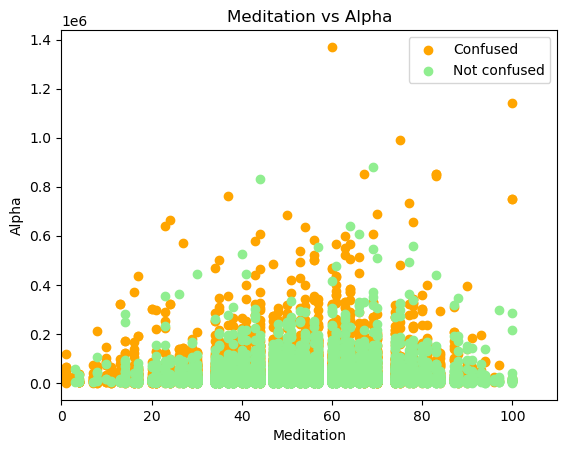

In [53]:
fig,(ax1) = plt.subplots()

ax1.scatter(meditation_greater_0.Mediation[meditation_greater_0["user-definedlabeln"]==1],
          meditation_greater_0.Alpha1[meditation_greater_0["user-definedlabeln"]==1],
          color="orange");
ax1.scatter(meditation_greater_0.Mediation[meditation_greater_0["user-definedlabeln"]==0],
          meditation_greater_0.Alpha1[meditation_greater_0["user-definedlabeln"]==0],
          color="lightgreen");

ax1.set_title("Meditation vs Alpha")
ax1.set_xlabel("Meditation")
ax1.set_ylabel("Alpha");
ax1.legend(["Confused","Not confused"]);
ax1.set_xlim((0,110));
# ax2.set_xlabel("Attention-Not Confused")
# ax2.set_ylabel("Alpha1");

# Alpha distribution in meditation
fig.savefig(r"C:\Users\HP\Notebook files\IP\plt generated\meditation-alpha.png")

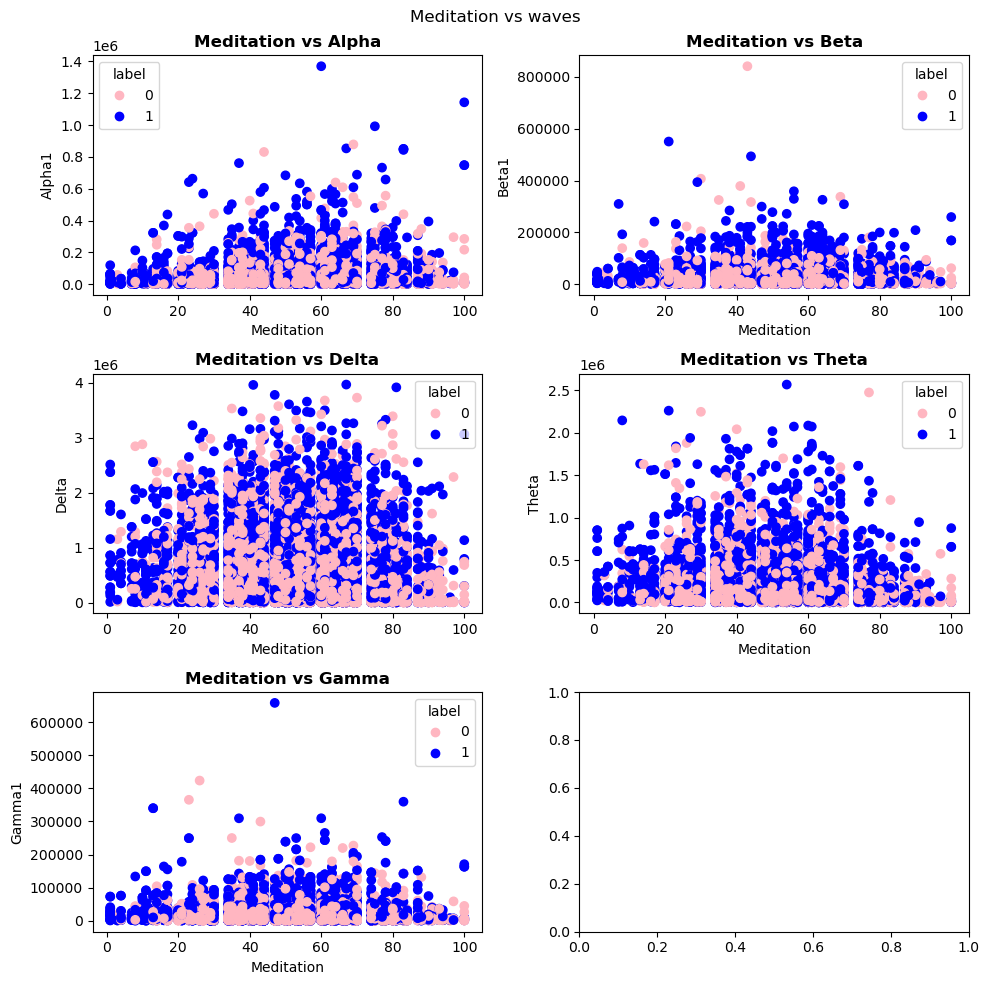

In [54]:
fig,((ax1,ax2),(ax3,ax4),(ax5,ax6)) = plt.subplots(nrows=3,ncols=2,figsize=(10,10))

plt1 = ax1.scatter(x = meditation_greater_0.Mediation,
                   y = meditation_greater_0.Alpha1,
                   c = meditation_greater_0["user-definedlabeln"],
                   cmap=lpbl       
               )

ax1.legend(*plt1.legend_elements(),title="label");
ax1.set(xlabel="Meditation")
ax1.set(ylabel="Alpha1")
ax1.set_title("Meditation vs Alpha",fontdict={"fontweight":"bold"})


plt2 = ax2.scatter(x = meditation_greater_0.Mediation,
                   y = meditation_greater_0.Beta1,
                   c = meditation_greater_0["user-definedlabeln"],
                   cmap=lpbl )

ax2.legend(*plt2.legend_elements(),title="label");
ax2.set(xlabel="Meditation")
ax2.set(ylabel="Beta1")
ax2.set_title("Meditation vs Beta",fontdict={"fontweight":"bold"})

plt3 = ax3.scatter(x = meditation_greater_0.Mediation,
                   y = meditation_greater_0.Delta,
                   c = meditation_greater_0["user-definedlabeln"],
                   cmap=lpbl )

ax3.legend(*plt3.legend_elements(),title="label");
ax3.set(xlabel="Meditation")
ax3.set(ylabel="Delta")
ax3.set_title("Meditation vs Delta",fontdict={"fontweight":"bold"})

plt4 = ax4.scatter(x = meditation_greater_0.Mediation,
                   y = meditation_greater_0.Theta,
                   c = meditation_greater_0["user-definedlabeln"],
                   cmap=lpbl)

ax4.legend(*plt4.legend_elements(),title="label");
ax4.set(xlabel="Meditation")
ax4.set(ylabel="Theta")
ax4.set_title("Meditation vs Theta",fontdict={"fontweight":"bold"})

plt5 = ax5.scatter(x = meditation_greater_0.Mediation,
                   y = meditation_greater_0.Gamma1,
                   c = meditation_greater_0["user-definedlabeln"],
                   cmap=lpbl)
ax5.legend(*plt5.legend_elements(),title="label");
ax5.set(xlabel="Meditation")
ax5.set(ylabel="Gamma1")
ax5.set_title("Meditation vs Gamma",fontdict={"fontweight":"bold"})

fig.suptitle("Meditation vs waves")
fig.tight_layout()
fig.savefig(r"C:\Users\HP\Notebook files\IP\plt generated\meditation-vs-waves.png")

### Attention vs userdefined label

In [55]:
pd.crosstab(attention_greater_0["user-definedlabeln"],attention_greater_0["Attention"])

Attention,1.0,3.0,4.0,7.0,8.0,10.0,11.0,13.0,14.0,16.0,...,84.0,87.0,88.0,90.0,91.0,93.0,94.0,96.0,97.0,100.0
user-definedlabeln,,,,,,,,,,,,,,,,,,,,,
0.0,13,4,9,13,16,18,17,28,29,32,...,36,38,30,27,20,9,10,5,11,19
1.0,75,13,33,16,38,44,57,56,90,79,...,20,9,10,7,16,14,7,3,3,23


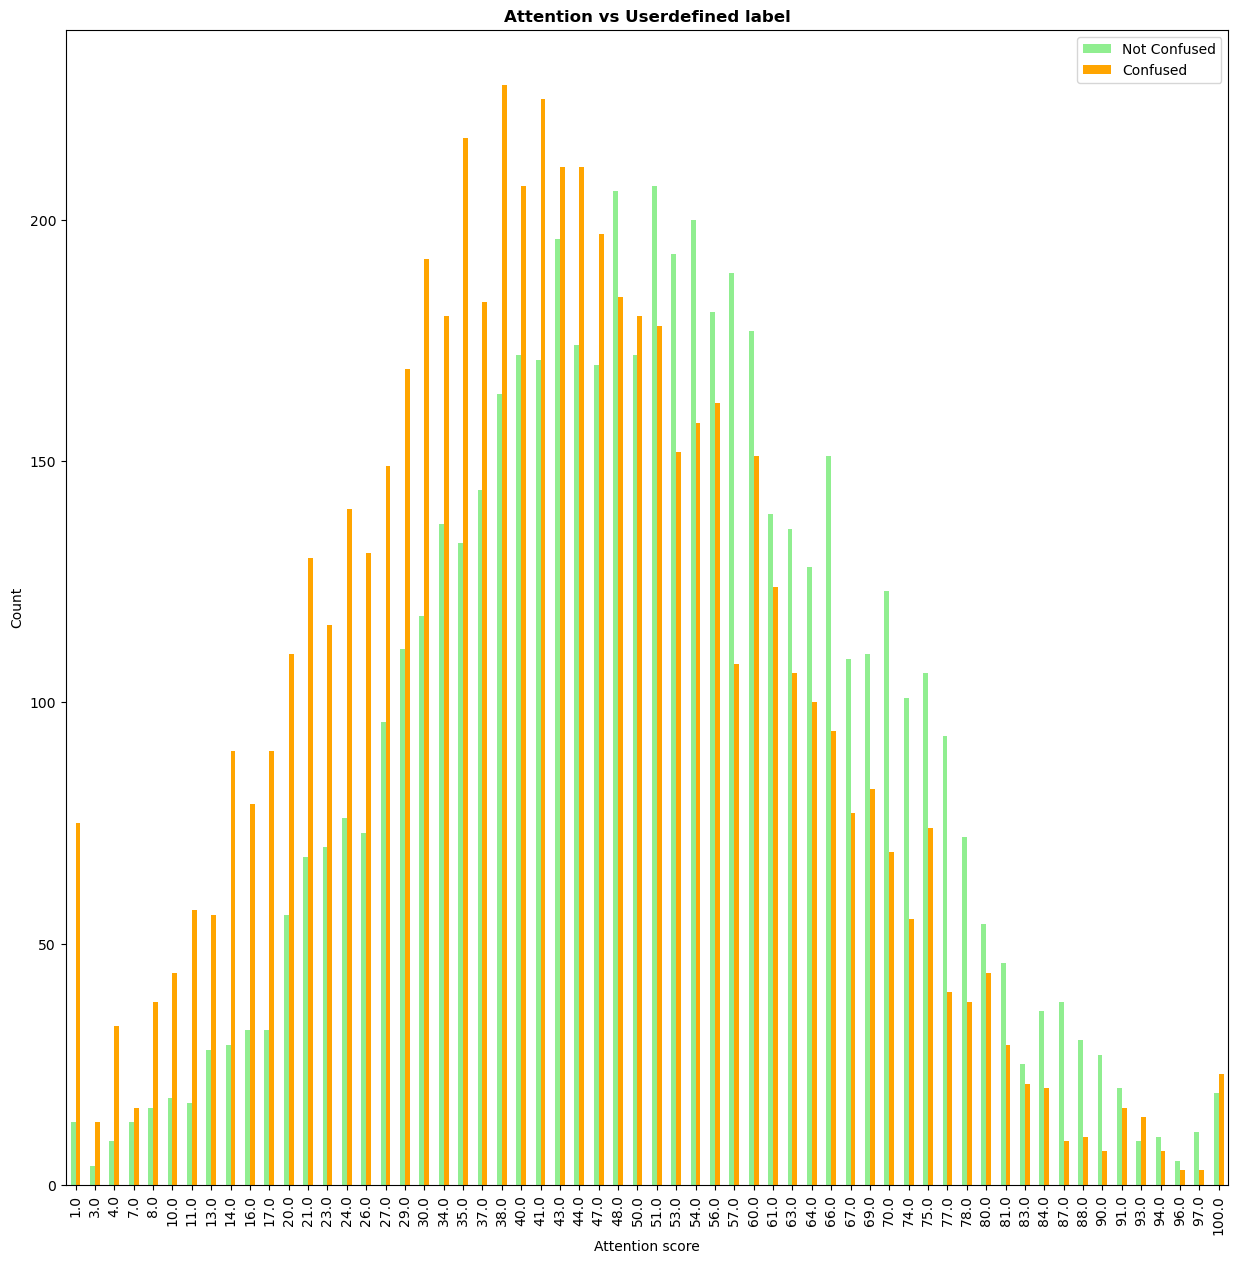

In [56]:
pd.crosstab(attention_greater_0["Attention"],attention_greater_0["user-definedlabeln"]).plot(kind="bar",figsize=(15,15),color=["lightgreen","orange"])
plt.legend(["Not Confused","Confused"]);
plt.title("Attention vs Userdefined label",fontweight="bold");
plt.xlabel("Attention score")
plt.ylabel("Count");
plt.savefig(r"C:\Users\HP\Notebook files\IP\plt generated\attention-vs-label.png")

In [57]:
pd.crosstab(meditation_greater_0["user-definedlabeln"],meditation_greater_0["Mediation"])

Mediation,1.0,3.0,4.0,7.0,8.0,10.0,11.0,13.0,14.0,16.0,...,84.0,87.0,88.0,90.0,91.0,93.0,94.0,96.0,97.0,100.0
user-definedlabeln,,,,,,,,,,,,,,,,,,,,,
0.0,0,2,3,1,5,3,2,5,24,9,...,43,28,23,15,20,10,13,4,7,15
1.0,22,4,11,12,11,15,19,20,23,37,...,35,32,21,24,5,9,6,4,2,8


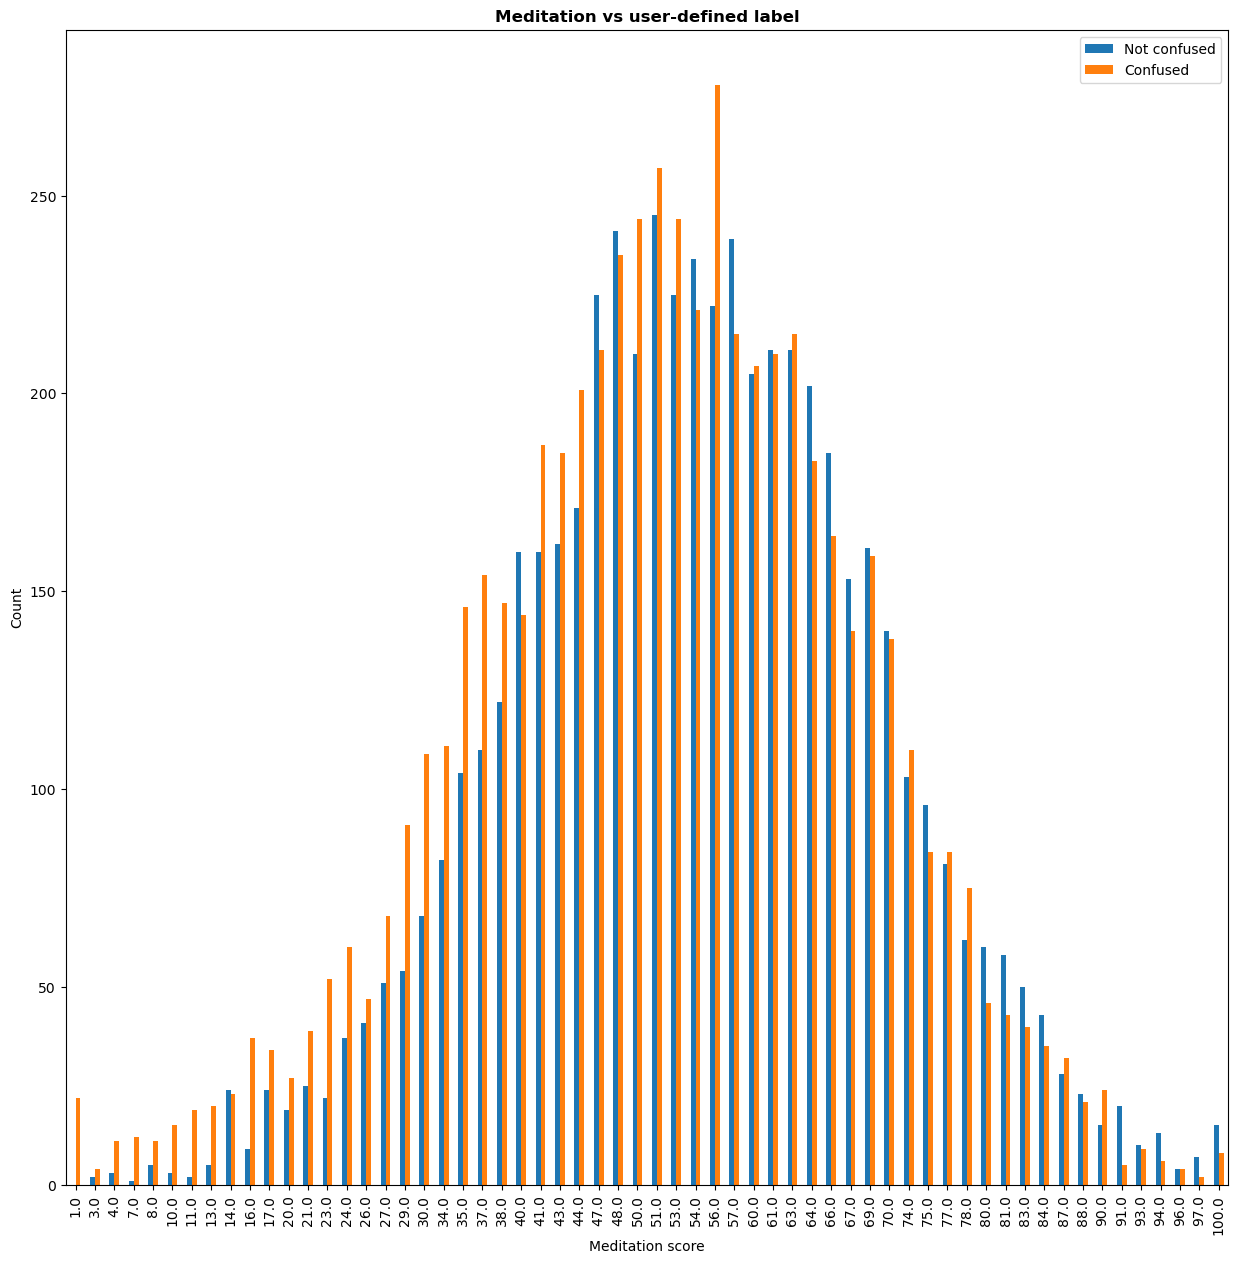

In [58]:
pd.crosstab(meditation_greater_0["Mediation"],meditation_greater_0["user-definedlabeln"]).plot(kind="bar",
                                                                                              figsize=(15,15),
                                                                                              );
plt.legend(["Not confused","Confused"]);
plt.title("Meditation vs user-defined label",fontweight="bold")
plt.xlabel("Meditation score")
plt.ylabel("Count");
plt.savefig(r"C:\Users\HP\Notebook files\IP\plt generated\meditation-vs-label.png")

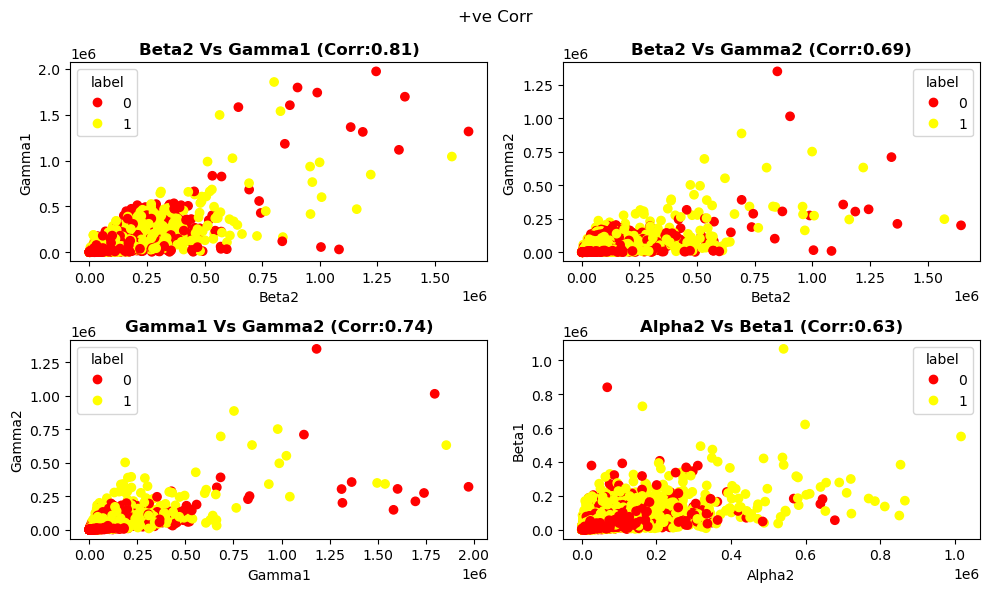

In [59]:
fig,((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows=2,ncols=2,figsize=(10,6))
plot1 = ax1.scatter(merged_data["Beta2"],merged_data["Gamma1"],c=merged_data["user-definedlabeln"],cmap="autumn");
plot2 = ax2.scatter(merged_data["Beta2"],merged_data["Gamma2"],c=merged_data["user-definedlabeln"],cmap="autumn");
plot3 = ax3.scatter(merged_data["Gamma1"],merged_data["Gamma2"],c=merged_data["user-definedlabeln"],cmap="autumn");
plot4 = ax4.scatter(merged_data["Alpha2"],merged_data["Beta1"],c=merged_data["user-definedlabeln"],cmap="autumn");

ax1.legend(*plot1.legend_elements(),title="label");
ax1.set_title("Beta2 Vs Gamma1 (Corr:0.81)",fontdict={"fontweight":"bold"})
ax1.set(xlabel="Beta2",ylabel="Gamma1")

ax2.legend(*plot2.legend_elements(),title="label");
ax2.set_title("Beta2 Vs Gamma2 (Corr:0.69)",fontdict={"fontweight":"bold"})
ax2.set(xlabel="Beta2",ylabel="Gamma2");

ax3.legend(*plot3.legend_elements(),title="label");
ax3.set_title("Gamma1 Vs Gamma2 (Corr:0.74)",fontdict={"fontweight":"bold"})
ax3.set(xlabel="Gamma1",ylabel="Gamma2")

ax4.legend(*plot4.legend_elements(),title="label");
ax4.set_title("Alpha2 Vs Beta1 (Corr:0.63)",fontdict={"fontweight":"bold"})
ax4.set(xlabel="Alpha2",ylabel="Beta1")

fig.suptitle("+ve Corr",fontdict={"weight":"bold"})
fig.tight_layout()
fig.savefig(r"C:\Users\HP\Notebook files\IP\plt generated\positive-corr.png")

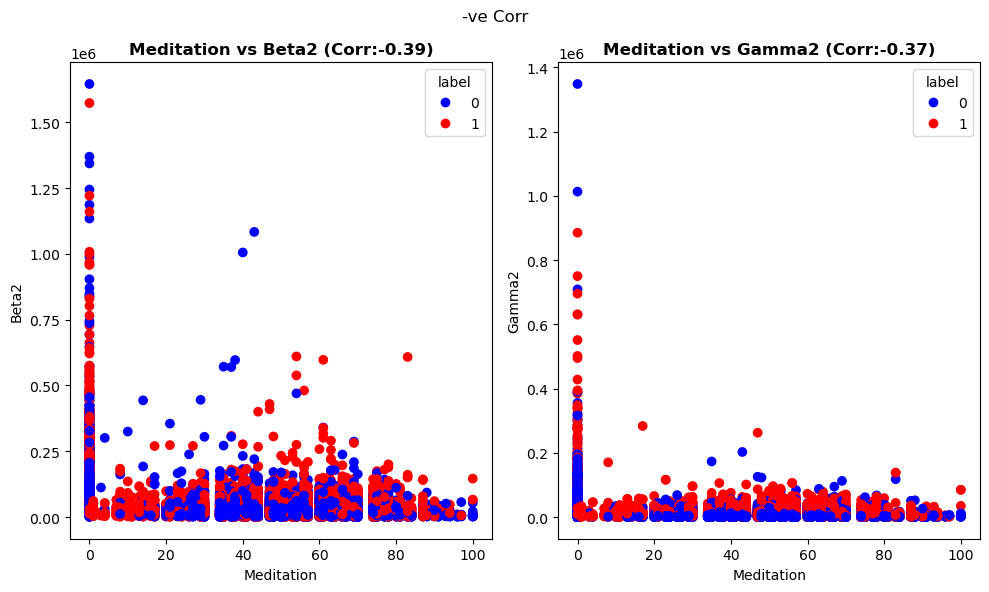

In [60]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(10,6))

plot1 = ax1.scatter(merged_data["Mediation"],merged_data["Beta2"],
                   c=merged_data["user-definedlabeln"],
                   cmap="bwr")

plot2 = ax2.scatter(merged_data["Mediation"],merged_data["Gamma2"],
                  c=merged_data["user-definedlabeln"],
                  cmap="bwr")

ax1.legend(*plot1.legend_elements(),title="label")
ax1.set_title("Meditation vs Beta2 (Corr:-0.39)",fontdict={"fontweight":"bold"})
ax1.set_xlabel("Meditation")
ax1.set_ylabel("Beta2")

ax2.legend(*plot2.legend_elements(),title="label")
ax2.set_title("Meditation vs Gamma2 (Corr:-0.37)",fontdict={"fontweight":"bold"})
ax2.set_xlabel("Meditation")
ax2.set_ylabel("Gamma2")

fig.suptitle("-ve Corr")
fig.savefig(r"C:\Users\HP\Notebook files\IP\plt generated\negative-corr.png")
fig.tight_layout()

In [61]:
attZero = merged_data[merged_data["Attention"]==0]
attNp = attZero.to_numpy()
attNp.shape

(1423, 21)

In [62]:
attZero.shape

(1423, 21)

In [63]:
attZero.tail()

,SubjectID,VideoID,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,...,Gamma1,Gamma2,predefinedlabel,user-definedlabeln,Age,Ethnicity_Bengali,Ethnicity_English,Ethnicity_Han Chinese,Gender_F,Gender_M
8989,6.0,9.0,0.0,0.0,-2048.0,37956.0,16445.0,728.0,2516.0,12741.0,...,1884.0,6989.0,1.0,0.0,24,0,0,1,0,1
8990,6.0,9.0,0.0,0.0,2042.0,16068.0,97095.0,2759.0,4807.0,9158.0,...,3486.0,2214.0,1.0,0.0,24,0,0,1,0,1
8991,6.0,9.0,0.0,0.0,2047.0,1234863.0,323799.0,259270.0,14671.0,118530.0,...,105745.0,122618.0,1.0,0.0,24,0,0,1,0,1
12214,9.0,5.0,0.0,0.0,90.0,281282.0,90754.0,13144.0,35149.0,12708.0,...,16597.0,8321.0,1.0,1.0,24,0,0,1,1,0
12215,9.0,5.0,0.0,0.0,208.0,610286.0,244078.0,42842.0,64420.0,28244.0,...,33784.0,27863.0,1.0,1.0,24,0,0,1,1,0


In [64]:
attNp[1422]

array([9.00000e+00, 5.00000e+00, 0.00000e+00, 0.00000e+00, 2.08000e+02,
       6.10286e+05, 2.44078e+05, 4.28420e+04, 6.44200e+04, 2.82440e+04,
       3.05950e+04, 3.37840e+04, 2.78630e+04, 1.00000e+00, 1.00000e+00,
       2.40000e+01, 0.00000e+00, 0.00000e+00, 1.00000e+00, 1.00000e+00,
       0.00000e+00])

In [65]:
for i in range(9):
    count = 0
    for j in range(len(attZero)):
        if (attNp[j][0]==i):
            count+=1
    print(f"Student {i} has Attention value 0, Count {count}")

Student 0 has Attention value 0, Count 2
Student 1 has Attention value 0, Count 0
Student 2 has Attention value 0, Count 0
Student 3 has Attention value 0, Count 144
Student 4 has Attention value 0, Count 0
Student 5 has Attention value 0, Count 0
Student 6 has Attention value 0, Count 1275
Student 7 has Attention value 0, Count 0
Student 8 has Attention value 0, Count 0


In [66]:
atthund = merged_data[merged_data["Attention"]==100]
attNpHund = atthund.to_numpy()
for i in range(9):
    count = 0
    for j in range(len(atthund)):
        if (attNpHund[j][0]==i):
            count+=1
    print(f"Student {i} has Attention value 0, Count {count}")


Student 0 has Attention value 0, Count 14
Student 1 has Attention value 0, Count 0
Student 2 has Attention value 0, Count 10
Student 3 has Attention value 0, Count 0
Student 4 has Attention value 0, Count 1
Student 5 has Attention value 0, Count 0
Student 6 has Attention value 0, Count 0
Student 7 has Attention value 0, Count 5
Student 8 has Attention value 0, Count 3


In [67]:
df = merged_data

In [68]:
df.columns

Index(['SubjectID', 'VideoID', 'Attention', 'Mediation', 'Raw', 'Delta',
       'Theta', 'Alpha1', 'Alpha2', 'Beta1', 'Beta2', 'Gamma1', 'Gamma2',
       'predefinedlabel', 'user-definedlabeln', 'Age', 'Ethnicity_Bengali',
       'Ethnicity_English', 'Ethnicity_Han Chinese', 'Gender_F', 'Gender_M'],
      dtype='object')

In [69]:
len(df.columns)

21

In [70]:
df["att"] = 0

In [71]:
len(df.columns)

22

In [72]:
npu = df["user-definedlabeln"].to_numpy()
npu

array([0., 0., 0., ..., 0., 0., 0.])

In [73]:
len(npu)

12811

In [74]:
# 1-Confused -> 0-NotAttentive
# 0-NotConfused -> 1-Attentive
np_t = []

for i in range(len(npu)):
    if(npu[i]==0):
        np_t.append(1)
    else:
        np_t.append(0)

In [75]:
np_t

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [76]:
df["att"] = pd.DataFrame(np_t)

In [77]:
df.att.value_counts()

0    6567
1    6244
Name: att, dtype: int64

In [78]:
merged_data["user-definedlabeln"].value_counts()

1.0    6567
0.0    6244
Name: user-definedlabeln, dtype: int64

In [79]:
df

,SubjectID,VideoID,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,...,Gamma2,predefinedlabel,user-definedlabeln,Age,Ethnicity_Bengali,Ethnicity_English,Ethnicity_Han Chinese,Gender_F,Gender_M,att
0,0.0,0.0,56.0,43.0,278.0,301963.0,90612.0,33735.0,23991.0,27946.0,...,8293.0,0.0,0.0,25,0,0,1,0,1,1
1,0.0,0.0,40.0,35.0,-50.0,73787.0,28083.0,1439.0,2240.0,2746.0,...,2740.0,0.0,0.0,25,0,0,1,0,1,1
2,0.0,0.0,47.0,48.0,101.0,758353.0,383745.0,201999.0,62107.0,36293.0,...,25354.0,0.0,0.0,25,0,0,1,0,1,1
3,0.0,0.0,47.0,57.0,-5.0,2012240.0,129350.0,61236.0,17084.0,11488.0,...,33932.0,0.0,0.0,25,0,0,1,0,1,1
4,0.0,0.0,44.0,53.0,-8.0,1005145.0,354328.0,37102.0,88881.0,45307.0,...,29749.0,0.0,0.0,25,0,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12806,9.0,9.0,64.0,38.0,-39.0,127574.0,9951.0,709.0,21732.0,3872.0,...,960.0,1.0,0.0,24,0,0,1,1,0,1
12807,9.0,9.0,61.0,35.0,-275.0,323061.0,797464.0,153171.0,145805.0,39829.0,...,10010.0,1.0,0.0,24,0,0,1,1,0,1
12808,9.0,9.0,60.0,29.0,-426.0,680989.0,154296.0,40068.0,39122.0,10966.0,...,2024.0,1.0,0.0,24,0,0,1,1,0,1
12809,9.0,9.0,60.0,29.0,-84.0,366269.0,27346.0,11444.0,9932.0,1939.0,...,1764.0,1.0,0.0,24,0,0,1,1,0,1


In [80]:
df.drop(columns=["predefinedlabel","user-definedlabeln"],axis=1,inplace=True)

In [81]:
df

,SubjectID,VideoID,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,Age,Ethnicity_Bengali,Ethnicity_English,Ethnicity_Han Chinese,Gender_F,Gender_M,att
0,0.0,0.0,56.0,43.0,278.0,301963.0,90612.0,33735.0,23991.0,27946.0,45097.0,33228.0,8293.0,25,0,0,1,0,1,1
1,0.0,0.0,40.0,35.0,-50.0,73787.0,28083.0,1439.0,2240.0,2746.0,3687.0,5293.0,2740.0,25,0,0,1,0,1,1
2,0.0,0.0,47.0,48.0,101.0,758353.0,383745.0,201999.0,62107.0,36293.0,130536.0,57243.0,25354.0,25,0,0,1,0,1,1
3,0.0,0.0,47.0,57.0,-5.0,2012240.0,129350.0,61236.0,17084.0,11488.0,62462.0,49960.0,33932.0,25,0,0,1,0,1,1
4,0.0,0.0,44.0,53.0,-8.0,1005145.0,354328.0,37102.0,88881.0,45307.0,99603.0,44790.0,29749.0,25,0,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12806,9.0,9.0,64.0,38.0,-39.0,127574.0,9951.0,709.0,21732.0,3872.0,39728.0,2598.0,960.0,24,0,0,1,1,0,1
12807,9.0,9.0,61.0,35.0,-275.0,323061.0,797464.0,153171.0,145805.0,39829.0,571280.0,36574.0,10010.0,24,0,0,1,1,0,1
12808,9.0,9.0,60.0,29.0,-426.0,680989.0,154296.0,40068.0,39122.0,10966.0,26975.0,20427.0,2024.0,24,0,0,1,1,0,1
12809,9.0,9.0,60.0,29.0,-84.0,366269.0,27346.0,11444.0,9932.0,1939.0,3283.0,12323.0,1764.0,24,0,0,1,1,0,1


In [82]:
X = df.drop("att",axis=1)
y = df["att"]

In [86]:
# RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

X_train,X_test,y_train,y_test = train_test_split(X,
                                                y,
                                                test_size=0.2)

clf = RandomForestClassifiber()
clf.fit(X_train,y_train)

RandomForestClassifier()

In [158]:
rf_score = clf.score(X_test,y_test)
rf_score

0.926258291065158

In [90]:
y_preds = clf.predict(X_test)
y_preds

array([0, 1, 0, ..., 1, 1, 0], dtype=int64)

In [93]:
pd.crosstab(y_test,y_preds,rownames=["Actual label"],colnames=["Predicted label"])

Predicted label,0,1
Actual label,,
0,1227,38
1,151,1147


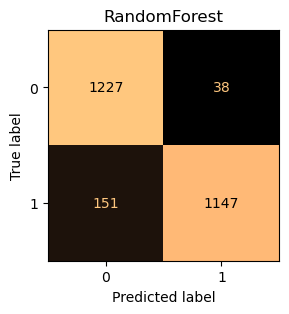

In [149]:
from sklearn.metrics import ConfusionMatrixDisplay
fig,ax = plt.subplots(figsize=(3,3))
ConfusionMatrixDisplay.from_predictions(y_test,y_preds,colorbar=False,ax=ax,cmap="copper");
ax.set_title("RandomForest");
fig.savefig(r"C:\Users\HP\Notebook files\IP\plt generated\cmtrx-rndfst.png")

In [157]:
# LogisticRegression
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train,y_train)
lr_score = lr.score(X_test,y_test)
lr_score

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.5314085056574327

In [131]:
y_preds_lr = lr.predict(X_test)
y_preds_lr

array([0, 1, 0, ..., 1, 0, 0], dtype=int64)

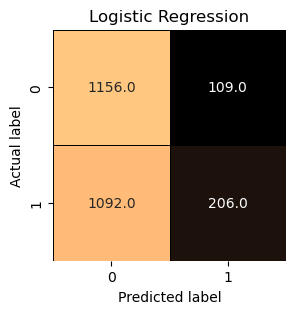

In [154]:
fig,ax = plt.subplots(figsize=(3,3))

ax = (sns.heatmap(confusion_matrix(y_test,y_preds_lr),annot=True,fmt='.1f',cbar=False,cmap="copper",linewidths=0.5,linecolor='black'))
ax.set_xlabel("Predicted label")
ax.set_ylabel("Actual label");
ax.set_title("Logistic Regression");
fig.savefig(r"C:\Users\HP\Notebook files\IP\plt generated\cmtrx-logregr.png")

In [156]:
#DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

dtclf = DecisionTreeClassifier()

dtclf.fit(X_train,y_train)
dt_score = dtclf.score(X_test,y_test)
dt_score

0.9742489270386266

In [125]:
y_preds_DT = dtclf.predict(X_test)
y_preds_DT

array([0, 1, 1, ..., 1, 1, 0], dtype=int64)

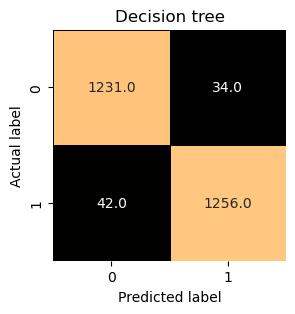

In [155]:
from sklearn.metrics import confusion_matrix
fig, ax = plt.subplots(figsize=(3,3))
ax = sns.heatmap(pd.DataFrame(confusion_matrix(y_test,y_preds_DT)),annot=True,fmt='.1f',cbar=False,cmap="copper",linecolor='black',linewidths=0.5)
ax.set_xlabel("Predicted label")
ax.set_ylabel("Actual label");
ax.set_title("Decision tree");
fig.savefig(r"C:\Users\HP\Notebook files\IP\plt generated\cmtrx-dtree.png")

In [175]:
from sklearn.neighbors import KNeighborsClassifier

Kclf = KNeighborsClassifier()

Kclf.fit(X_train,y_train)
kclf_score = Kclf.score(X_test,y_test)
kclf_score

C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.5513070620366758

In [176]:
y_preds_knn = Kclf.predict(X_test)
y_preds_knn

C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([0, 1, 0, ..., 1, 1, 1], dtype=int64)

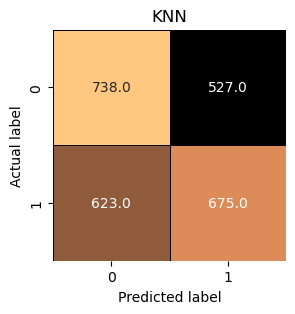

In [178]:
fig, ax = plt.subplots(figsize=(3,3))
ax = sns.heatmap(pd.DataFrame(confusion_matrix(y_test,y_preds_knn)),annot=True,fmt='.1f',cbar=False,cmap="copper",linecolor='black',linewidths=0.5)
ax.set_xlabel("Predicted label")
ax.set_ylabel("Actual label");
ax.set_title("KNN");
fig.savefig(r"C:\Users\HP\Notebook files\IP\plt generated\cmtrx-knn.png")

In [179]:
score_df = pd.DataFrame({"RandomForest":rf_score,
                         "LogisticRegression":lr_score,
                         "DecisionTree":dt_score,
                         "KNN":kclf_score},index=["accuracy"])
score_df

,RandomForest,LogisticRegression,DecisionTree,KNN
accuracy,0.926258,0.531409,0.974249,0.551307


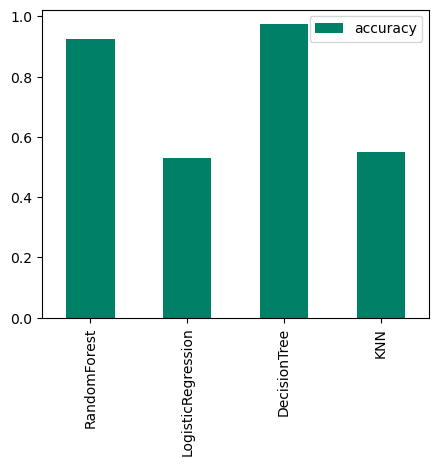

In [180]:
score_df.T.plot(kind='bar',figsize=(5,4),cmap="summer");
plt.savefig(r"C:\Users\HP\Notebook files\IP\plt generated\accuracy-bfr-tuning.png")

### Hyperparameter tuning

In [ ]:
# Logistic Regression

In [ ]:
# KNN

In [84]:
set PATH=/Library/TeX/texbin:$PATH